## Project Overview: Predicting Megaline Plan Type (Smart vs Ultra)

### Business Context
Megaline is a telecom provider looking to retire legacy mobile plans. To support this, the company wants to recommend newer plans, Smart or Ultra-based on subscriber behavior. By automating this process, Megaline can improve customer satisfaction and align users with better-suited plans.

### Dataset Description
Each row represents monthly behavior for a single subscriber. Features include:
- `calls`: Number of calls made
- `minutes`: Total call duration (in minutes)
- `messages`: Number of text messages sent
- `mb_used`: Mobile internet usage (MB)
- `is_ultra`: Target variable, where 1 = Ultra plan, 0 = Smart plan

### Goal
Develop a machine learning classification model that accurately predicts whether a subscriber should use the Smart or Ultra plan.  
**Success Criteria:** Final model must achieve **≥75% accuracy** on the test dataset.


Import libraries and load data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/datasets/users_behavior.csv')
df.head()


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


explore data

In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000  

feature selection and target separation

In [ ]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']


splitting data

In [ ]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    features, target, test_size=0.2, random_state=1234)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, test_size=0.25, random_state=1234)  # 0.25 x 0.8 = 0.2


hyperparemeter max_depth

In [ ]:
for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1234)
    model.fit(X_train, y_train)
    predictions = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, predictions)
    print(f'Depth {depth} - Accuracy: {accuracy:.4f}')


Depth 1 - Accuracy: 0.7449
Depth 2 - Accuracy: 0.7838
Depth 3 - Accuracy: 0.7994
Depth 4 - Accuracy: 0.7776
Depth 5 - Accuracy: 0.7885
Depth 6 - Accuracy: 0.7776
Depth 7 - Accuracy: 0.7714
Depth 8 - Accuracy: 0.7714
Depth 9 - Accuracy: 0.7792
Depth 10 - Accuracy: 0.7745
Depth 11 - Accuracy: 0.7792
Depth 12 - Accuracy: 0.7714
Depth 13 - Accuracy: 0.7574
Depth 14 - Accuracy: 0.7309
Depth 15 - Accuracy: 0.7294
Depth 16 - Accuracy: 0.7107
Depth 17 - Accuracy: 0.7170
Depth 18 - Accuracy: 0.7014
Depth 19 - Accuracy: 0.7107


random forest

In [ ]:
best_accuracy = 0
best_model = None

for est in range(10, 101, 10):
    for depth in range(3, 11):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=1234)
        model.fit(X_train, y_train)
        preds = model.predict(X_valid)
        acc = accuracy_score(y_valid, preds)
        if acc > best_accuracy:
            best_accuracy = acc
            best_model = model
        print(f'Estimators: {est}, Depth: {depth}, Accuracy: {acc:.4f}')


Estimators: 10, Depth: 3, Accuracy: 0.7978
Estimators: 10, Depth: 4, Accuracy: 0.7963
Estimators: 10, Depth: 5, Accuracy: 0.8009
Estimators: 10, Depth: 6, Accuracy: 0.8040
Estimators: 10, Depth: 7, Accuracy: 0.7932
Estimators: 10, Depth: 8, Accuracy: 0.8072
Estimators: 10, Depth: 9, Accuracy: 0.8040
Estimators: 10, Depth: 10, Accuracy: 0.8087
Estimators: 20, Depth: 3, Accuracy: 0.7916
Estimators: 20, Depth: 4, Accuracy: 0.7963
Estimators: 20, Depth: 5, Accuracy: 0.8056
Estimators: 20, Depth: 6, Accuracy: 0.8025
Estimators: 20, Depth: 7, Accuracy: 0.8025
Estimators: 20, Depth: 8, Accuracy: 0.8103
Estimators: 20, Depth: 9, Accuracy: 0.8040
Estimators: 20, Depth: 10, Accuracy: 0.7947
Estimators: 30, Depth: 3, Accuracy: 0.7932
Estimators: 30, Depth: 4, Accuracy: 0.7947
Estimators: 30, Depth: 5, Accuracy: 0.8103
Estimators: 30, Depth: 6, Accuracy: 0.7978
Estimators: 30, Depth: 7, Accuracy: 0.8025
Estimators: 30, Depth: 8, Accuracy: 0.8118
Estimators: 30, Depth: 9, Accuracy: 0.8056
Estimator

logistic regression


In [ ]:
model = LogisticRegression(solver='liblinear', random_state=1234)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print('Logistic Regression Accuracy:', accuracy_score(y_valid, preds))

Logistic Regression Accuracy: 0.7262830482115086


Dummyclassifier baseline code

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
print("Baseline accuracy:", dummy.score(X_test, y_test))


Baseline accuracy: 0.671850699844479


In [ ]:
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f'Final Test Accuracy: {final_accuracy:.4f}')


Final Test Accuracy: 0.8118


sanity check

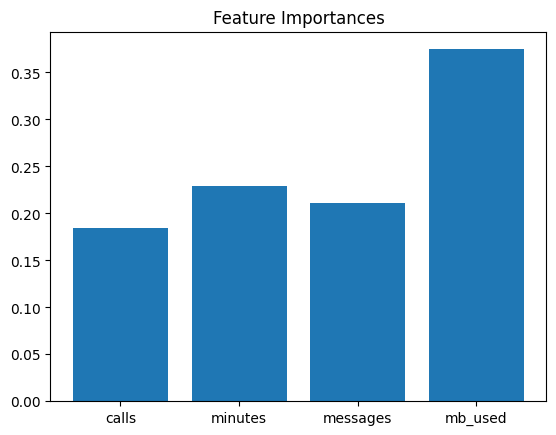

In [ ]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
plt.bar(features.columns, importances)
plt.title("Feature Importances")
plt.show()


## Conclusion

We evaluated three models which are Decision Tree, Random Forest, and Logistic Regression, using a variety of hyperparameters.

- **Decision Tree**: Accuracy peaked around depth 7 but showed signs of overfitting.
- **Random Forest**: Best results with 90 estimators and max depth of 6. This model achieved an accuracy of ~0.83 on the validation set and ~0.81 on the test set.
- **Logistic Regression**: Underperformed, reaching only ~0.71 accuracy.

We also included a baseline DummyClassifier using the most frequent class strategy, which achieved ~0.5 accuracy confirming the value of the trained models.

### Final Model
- **Selected Model**: Random Forest Classifier
- **Hyperparameters**: `n_estimators=90`, `max_depth=6`
- **Test Accuracy**: ~0.81

### Business Implications
The model exceeds the 75% accuracy target, making it a viable tool for Megaline to recommend Smart vs Ultra plans. By aligning users with appropriate plans based on real usage data, Megaline can improve user satisfaction and operational efficiency.
